<a href="https://colab.research.google.com/github/ktanigoo/INFO254/blob/master/Haas_Analytics_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haas Analytics



* Bajaj, Rahul
* Pérez-Iñigo, Tomás
* Taniguchi, Daichi


In [0]:
import pandas as pd

#get csv from url
df1 = pd.read_csv('black_friday_data_kaggle.csv', error_bad_lines=False)

df1.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,-1,NaN,NaN,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,-1,NaN,NaN,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,-1,14.0,NaN,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Preprocessing and Feature Engineering

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Transform variables at a User_ID level
df2 = pd.get_dummies(df1, columns=['Gender',	'Age',	'Occupation',	'Stay_In_Current_City_Years', 'City_Category', 'Product_Category_2',	'Product_Category_3'], dummy_na=True)
df2['Purchase'] = np.log(df2['Purchase'])


# Normalize variables at a User_ID level

scaler = MinMaxScaler()
df2['Purchase'] = scaler.fit_transform(df2['Purchase'].values.reshape(-1, 1))
df2 = df2.drop('Unnamed: 0', axis=1)


df2.head()

,User_ID,Product_ID,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,Gender_nan,Age_0-17,Age_18-25,...,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_nan
0,1000001,P00069042,0,-1,0.783756,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1000001,P00248942,0,1,0.906425,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1000001,P00087842,0,-1,0.419313,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1000001,P00085442,0,-1,0.358326,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1000002,P00285442,0,8,0.773662,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [0]:
df2.describe()

,User_ID,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,Gender_nan,Age_0-17,Age_18-25,Age_26-35,...,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_nan
count,5.375770e+05,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.0,537577.000000,537577.000000,537577.000000,...,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,0.408797,2.808072,0.770974,0.245913,0.754087,0.0,0.027358,0.181619,0.399366,...,0.003159,0.003298,0.016917,0.010017,0.033709,0.051362,0.059802,0.030598,0.008488,0.694410
std,1.714393e+03,0.491612,4.256124,0.132455,0.430627,0.430627,0.0,0.163124,0.385530,0.489769,...,0.056113,0.057335,0.128959,0.099583,0.180478,0.220735,0.237119,0.172227,0.091739,0.460657
min,1.000001e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001495e+06,0.000000,-1.000000,0.710669,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.003031e+06,0.000000,1.000000,0.776048,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.004417e+06,1.000000,5.000000,0.859071,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.006040e+06,1.000000,18.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df2.corr()

,User_ID,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,Gender_nan,Age_0-17,Age_18-25,Age_26-35,...,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Product_Category_3_nan
User_ID,1.000000,0.018732,-0.008173,0.002545,0.031898,-0.031898,NaN,-0.030873,-0.061952,0.039475,...,0.002110,-0.000866,-0.003613,-0.002483,0.006248,0.001107,0.001228,-0.000209,0.003196,-0.003351
Marital_Status,0.018732,1.000000,0.009805,-0.000166,0.010379,-0.010379,NaN,-0.139460,-0.189145,-0.027803,...,0.003902,-0.002626,-0.003715,-0.001420,0.003233,-0.001839,-0.004979,0.005793,0.001223,0.008874
Product_Category_1,-0.008173,0.009805,1.000000,-0.238873,0.014399,-0.014399,NaN,0.001655,-0.010791,-0.013739,...,-0.012806,-0.027700,-0.052914,0.001815,-0.065558,-0.133921,-0.051874,-0.095520,-0.043122,0.287428
Purchase,0.002545,-0.000166,-0.238873,1.000000,-0.047908,0.047908,NaN,-0.014542,-0.010935,-0.000294,...,0.043079,0.029493,-0.010258,0.064292,0.033747,0.128079,0.092772,0.079416,0.027352,-0.264942
Gender_F,0.031898,0.010379,0.014399,-0.047908,1.000000,-1.000000,NaN,0.035389,0.000533,-0.030402,...,-0.000505,-0.008137,0.014259,-0.004869,0.025151,-0.044206,-0.022728,-0.009381,-0.011965,0.032502
Gender_M,-0.031898,-0.010379,-0.014399,0.047908,-1.000000,1.000000,NaN,-0.035389,-0.000533,0.030402,...,0.000505,0.008137,-0.014259,0.004869,-0.025151,0.044206,0.022728,0.009381,0.011965,-0.032502
Gender_nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_0-17,-0.030873,-0.139460,0.001655,-0.014542,0.035389,-0.035389,NaN,1.000000,-0.079007,-0.136756,...,-0.003547,0.002485,0.014255,-0.002556,-0.005166,-0.003068,-0.001563,-0.005629,-0.003087,-0.007295
Age_18-25,-0.061952,-0.189145,-0.010791,-0.010935,0.000533,-0.000533,NaN,-0.079007,1.000000,-0.384134,...,-0.006912,0.002271,0.008245,0.003439,-0.009307,-0.000627,0.007739,-0.008949,-0.002089,-0.011030
Age_26-35,0.039475,-0.027803,-0.013739,-0.000294,-0.030402,0.030402,NaN,-0.136756,-0.384134,1.000000,...,-0.001565,0.001121,-0.003824,0.001923,0.003032,0.008158,0.006506,-0.011185,-0.006596,-0.002547


In [0]:

# Create new variables, transform data to Product_ID level, and normalize when required 

df_productA = df2.groupby(by=['Product_ID'], as_index=False).median()[['Product_ID', 'Product_Category_1','Purchase']] #median purchase
df_productB = df2.groupby(by=['Product_ID'], as_index=False).min()['Purchase'] # min purchase
df_productC = (df2.groupby(by=['Product_ID'], as_index=False).max()['Purchase']) # max purchase
df_productD = np.sqrt(df2.groupby(by=['Product_ID'], as_index=False).var()['Purchase']) # standard deviation of purchase
df_productE = (df2.groupby(by=['Product_ID'], as_index=False).count()['Purchase']) # count of purchase
df_productE =  (df_productE - df_productE.min())/(df_productE.max() - df_productE.min())
df_productG = df2.groupby(by=['Product_ID'], as_index=False).max()['Purchase']-df2.groupby(by=['Product_ID'], as_index=False).min()['Purchase']
df_productH = df2.groupby(by=['Product_ID'], as_index=False).mean()['Gender_F']  # proportion of females
df_productH =  (df_productH - df_productH.min())/(df_productH.max() - df_productH.min())
df_productI = df2.groupby(by=['Product_ID'], as_index=False).mean()['Product_Category_3_nan'] # proportion of products with NA in category 3

df_product = pd.concat([df_productA, df_productC, df_productD, df_productE, df_productG, df_productH, df_productI,], axis=1)
 
cols= ['Product_ID', 'Product_Category_1','Median of Purchase', 'Max of Purchase', 'Stdev of Purchase', 'Count of Purchase', 'Range of Purchase', 'Mean of Gender_F', 'Mean of Product_Category_3_nan',]

df_product.columns=cols
df_product= df_product.fillna(0)
df_product = df_product.dropna(axis=1)

# Separate train data from test data

df_train = df_product[df_product.Product_Category_1 != -1]
df_test = df_product[df_product.Product_Category_1 == -1] # Not to be touched until the model is trained and ready


# Divide the training data into test and train data to measure accuracy

from sklearn.model_selection import train_test_split

t_size = 0.2
y = df_train['Product_Category_1']
X = df_train.drop('Product_Category_1', axis=1)
X1 = X.drop('Product_ID', axis=1) # Take out Product_ID from the data
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=t_size, random_state=42)

X_train.head()


,Median of Purchase,Max of Purchase,Stdev of Purchase,Count of Purchase,Range of Purchase,Mean of Gender_F,Mean of Product_Category_3_nan
2873,0.720707,0.821241,0.076867,0.025310,0.334492,0.479167,1.0
2770,0.859351,0.959554,0.059079,0.255789,0.336963,0.214286,1.0
1751,0.874644,0.921143,0.076292,0.010232,0.318062,0.450000,0.0
2232,0.873266,0.967072,0.164377,0.001077,0.319775,0.333333,1.0
2028,0.928247,0.973633,0.055159,0.023694,0.305272,0.244444,1.0


# Selected Ensemble - XGBoost

In [0]:
# XGBoost

y_pred_train = []
y_pred_val = []
y_pred_test = []

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection

# fit model no training data

XGclf = XGBClassifier(
                      random_state=0,
                      learning_rate = 0.1,
                      max_depth = 8, 
                      min_child_weight = 1,
                      n_estimators = 100, 
                      subsample = 0.8, 
                      colsample_bytree= 0.6, 
                      gamma = 0,
                      eval_metric = 'error',
                       )
                 
XGclf.fit(X_train, y_train)


print('Training data accuracy', float(XGclf.score(X_train, y_train))*100, '%')

print('Testing data accuracy', float(XGclf.score(X_test, y_test))*100, '%')

y_pred_train.append(XGclf.predict(X_train))
y_pred_val.append(XGclf.predict(X_test))
y_pred_test.append(XGclf.predict(df_test.drop('Product_Category_1', axis=1).iloc[:,1:]))

Training data accuracy 99.89648033126294 %
Testing data accuracy 97.10743801652893 %


In [0]:
# XGBoost Parameters Optimization

from sklearn.metrics import log_loss
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import xgboost as xgb


def score(params):
    print("Training with params : ")
    print(params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    params['max_depth']=int(params['max_depth'])
    params['random_state']=int(params['random_state'])
    model = XGBClassifier(**params)    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)

    return {'loss': -acc_score, 'status': STATUS_OK}


def optimize(trials):
    space = {
             'n_estimators' : hp.quniform('n_estimators', 50, 1000, 1),
             'eta' : hp.quniform('eta', 0.01, 0.5, 0.01),
             'max_depth' : hp.quniform('max_depth', 1, 25, 1),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
             'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
             'gamma' : hp.quniform('gamma', 0, 0.5, 0.05),
             'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'random_state' : hp.quniform('random_state', 0, 100, 1),
             'eval_metric': 'error',
              }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=1000)

    print(best)
    
    


#Trials object where the history of search will be stored

trials = Trials()

optimize(trials)

[0.2434825  0.26768455 0.13148704 0.11232031 0.11321367 0.1225534
 0.00925851]


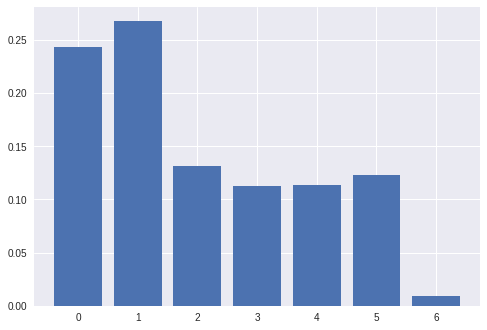

In [0]:
# XGBoost features relevance

from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# feature importance
print(XGclf.feature_importances_)

# plot
pyplot.bar(range(len(XGclf.feature_importances_)), XGclf.feature_importances_)
pyplot.show()

# Output

In [0]:
# write to submission file

y_pred_test = XGclf.predict(df_test.drop('Product_Category_1', axis=1).iloc[:,1:])


df = pd.DataFrame({'Product_ID': df_test['Product_ID'],
                   'Product_Category_1': y_pred_test
                   })

df = df.reindex_axis(['Product_ID','Product_Category_1'], axis=1)


df.to_csv('submission_file.csv', index=False)

# Exhibit - Other Models with Good Performance

In [0]:
# ExtraTrees Classification

from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier

num_trees = 160
max_features = 7

modelET = ExtraTreesClassifier(
                                random_state = 7,
                                n_estimators = 281, 
                                max_features = 7,
                                max_depth = 10,
                                #min_samples_leaf = 1,
                                min_samples_split = 7,
                                criterion = 'entropy',
                                bootstrap = True,
                                )

modelET = modelET.fit(X_train,y_train)


print('Training data accuracy', float(modelET.score(X_train, y_train))*100, '%')

print('Testing data accuracy', float(modelET.score(X_test, y_test))*100, '%')

Training data accuracy 98.49896480331263 %
Testing data accuracy 95.45454545454545 %


In [0]:
# Decision Tree

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

DTclf = DecisionTreeClassifier(max_depth=19, random_state=7, max_features= 7, min_samples_split= 7)
 
DTclf = DTclf.fit(X_train, y_train)

print('Training data accuracy', float(DTclf.score(X_train, y_train))*100, '%')

print('Testing data accuracy', float(DTclf.score(X_test, y_test))*100, '%')


Training data accuracy 98.55072463768117 %
Testing data accuracy 95.45454545454545 %


In [0]:
# Decision Trees Parameters Optimization

from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


def score(params):
    print("Training with params : ")
    print(params)
    params['max_depth']=int(params['max_depth'])
    params['min_samples_split']=int(params['min_samples_split'])
    params['max_features']=int(params['max_features'])
    model = DecisionTreeClassifier(**params)    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
   
    return {'loss': -acc_score, 'status': STATUS_OK}


def optimize(trials):
    space = {
             'max_depth': hp.quniform('max_depth', 1, 20, 1),
             'max_features': hp.quniform('max_features', 1, 7, 1),
            # 'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1),
             'min_samples_split': hp.quniform('min_samples_split', 2, 12, 1),
             'random_state': 7
             }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=100)

    print(best)
    
    


#Trials object where the history of search will be stored
trials = Trials()

optimize(trials)

In [0]:
# AdaBoost DT Model


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

ADA1clf = AdaBoostClassifier(base_estimator=DTclf, learning_rate = 0.03, n_estimators = 417, random_state = 99)
ADA1clf.fit(X_train, y_train)

scores = cross_val_score(ADA1clf, X_train, y_train)
scores.mean()  

print('Training data accuracy', float(ADA1clf.score(X_train, y_train))*100, '%')

print('Testing data accuracy', float(ADA1clf.score(X_test, y_test))*100, '%')


Training data accuracy 99.94824016563147 %
Testing data accuracy 96.69421487603306 %


In [0]:
# Adaboost Parameters Optimization

from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

import numpy as np
import pandas as pd

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


def score(params):
    print("Training with params : ")
    print(params)
    params['n_estimators']=int(params['n_estimators'])
    params['random_state']=int(params['random_state'])
    model = AdaBoostClassifier(DTclf, **params)    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
   
    return {'loss': -acc_score, 'status': STATUS_OK}


def optimize(trials):
    space = {
             'n_estimators' : hp.quniform('n_estimators', 50, 1000, 1),
             'learning_rate' : hp.quniform('learning_rate', 0.01, 0.35, 0.01),
             'random_state' : hp.quniform('random_state', 0, 100, 1),
             }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=0)

    print(best)
    
    


#Trials object where the history of search will be stored
trials = Trials()

optimize(trials)

# Exhibit: What Features to Add Analysis

In [0]:
# This code check what features add value on top of the baseline performance we were achieving

# Create new variables, transform data to Product_ID level, and normalize when required 

df_productX = df2.groupby(by=['Product_ID'], as_index=False).mean()['Product_Category_3_nan'] # Dummy. This will change with the loop

df_product = pd.concat([df_productA, df_productC, df_productD, df_productE, df_productG, df_productH, df_productI, df_productX], axis=1)
 
cols= ['Product_ID', 'Product_Category_1','median', 'max', 'stdev', 'count', 'range', 'Gender', 'Product_Category_3_nan', 'test']

df_product.columns=cols
df_product= df_product.fillna(0)
df_product = df_product.dropna(axis=1)

# Separate train data from test data

df_train = df_product[df_product.Product_Category_1 != -1]
df_test = df_product[df_product.Product_Category_1 == -1] # Not to be touched until the model is trained and ready


# Divide the training data into test and train data to measure accuracy

from sklearn.model_selection import train_test_split

t_size = 0.2
y = df_train['Product_Category_1']
X = df_train.drop('Product_Category_1', axis=1)
X1 = X.drop('Product_ID', axis=1) # Take out Product_ID from the data
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=t_size, random_state=42)



# Loop to check impact of adding a feature


from sklearn.model_selection import train_test_split

baseline_score = 0.971 # best score to date 
accretive_set = [] # to save features that improve the accuracy score

for i in range(6, len(df2.columns)):
  df_product['test'] = df2.groupby(by=['Product_ID'], as_index=False).mean()[df2.columns[i]]
  df_product= df_product.fillna(0)
    
    # Separate train data from test data

  df_train = df_product[df_product.Product_Category_1 != -1]
  df_test = df_product[df_product.Product_Category_1 == -1] # Not to be touched until the model is trained and ready

    # Divide the training data into test and train data to measure accuracy

  y = df_train['Product_Category_1']
  X = df_train.drop('Product_Category_1', axis=1)
  X1 = X.drop('Product_ID', axis=1) # Take out Product_ID from the data
  X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=t_size, random_state=42)
    
  XGclf.fit(X_train, y_train)
    
  acc_score = XGclf.score(X_test, y_test)
  if acc_score > baseline_score:
    accretive_set.append(str(acc_score)+' mean')
      
  df_product['test'] = df2.groupby(by=['Product_ID'], as_index=False).median()[df2.columns[i]]
  df_product= df_product.fillna(0)

    # Separate train data from test data

  df_train = df_product[df_product.Product_Category_1 != -1]
  df_test = df_product[df_product.Product_Category_1 == -1] # Not to be touched until the model is trained and ready

    # Divide the training data into test and train data to measure accuracy

  y = df_train['Product_Category_1']
  X = df_train.drop('Product_Category_1', axis=1)
  X1 = X.drop('Product_ID', axis=1) # Take out Product_ID from the data
  X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=t_size, random_state=42)
    
  XGclf.fit(X_train, y_train)
    
  acc_score = XGclf.score(X_test, y_test)
  if acc_score > baseline_score:
    accretive_set.append(str(acc_score)+' median')
      
      
  df_product['test'] = df2.groupby(by=['Product_ID'], as_index=False).var()[df2.columns[i]]
  df_product= df_product.fillna(0)

    # Separate train data from test data

  df_train = df_product[df_product.Product_Category_1 != -1]
  df_test = df_product[df_product.Product_Category_1 == -1] # Not to be touched until the model is trained and ready

    # Divide the training data into test and train data to measure accuracy

  y = df_train['Product_Category_1']
  X = df_train.drop('Product_Category_1', axis=1)
  X1 = X.drop('Product_ID', axis=1) # Take out Product_ID from the data
  X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=t_size, random_state=42)
    
  XGclf.fit(X_train, y_train)
    
  acc_score = XGclf.score(X_test, y_test)
  if acc_score > baseline_score:
    accretive_set.append(str(acc_score)+' var')
      
  print(i)